### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ydata_profiling as pf
#import missingno as msno

### Ingesting Data

In [2]:
train = pd.read_csv('datasets/train.csv', index_col='Id')
test =  pd.read_csv('datasets/test.csv', index_col='Id')
#data = pd.concat([train, test])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.std(skipna=True)#.plot()

C:\Users\gylbt\AppData\Local\Temp\ipykernel_1928\2324553653.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.std(skipna=True)#.plot()


MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea            40.177307
MiscVal   

### Variable Distribution

In [6]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
# grid = sns.FacetGrid(train)
# grid.map_dataframe(sns.histplot)
# plt.savefig('histograms.jpg')

## Missing Data

In [8]:
def check_missing(df=train):
    missing = df.isna().sum()
    missing_data = missing[missing > 0]
    return missing_data

check_missing()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Fill Missing Data

### YearBuilt

In [9]:
corr = train[["GarageYrBlt", "YearBuilt"]].corr()
corr

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.825667
YearBuilt,0.825667,1.000000


In [10]:
train["GarageYrBlt"].fillna(train["YearBuilt"],inplace=True)

## LotFrontage

In [11]:
check_missing()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

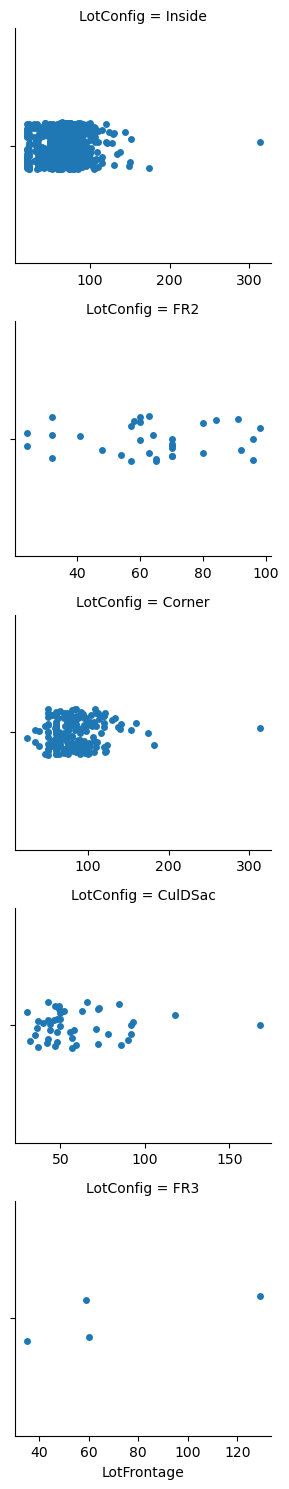

In [12]:
sns.catplot(data=train, x='LotFrontage',kind='strip', row='LotConfig', sharex=False,height=3,orient='portrait')

plt.show()


In [13]:
lot_front_dic = train.mask(train.LotFrontage.isna()) \
            .groupby('LotConfig') \
                ['LotFrontage'].median().round() \
                .to_dict()

lot_front_dic

{'Corner': 80.0, 'CulDSac': 50.0, 'FR2': 64.0, 'FR3': 60.0, 'Inside': 68.0}

In [14]:
missing_LF = train[train.LotFrontage.isna()]#.fillna(lot_front_dic,inplace=True)
for key, item in lot_front_dic.items():
    train.loc[(train['LotConfig']==key) & (train.LotFrontage.isna())] = item

In [15]:
check_missing()

Alley           1115
MasVnrType         6
MasVnrArea         6
BsmtQual          31
BsmtCond          31
BsmtExposure      32
BsmtFinType1      31
BsmtFinType2      32
Electrical         1
FireplaceQu      600
GarageType        74
GarageFinish      74
GarageQual        74
GarageCond        74
PoolQC          1195
Fence            973
MiscFeature     1162
dtype: int64

# Drop Columns

### Drop 8 rows of ManVnrArea

In [16]:
train.where(train["MasVnrArea"].isna()).dropna(inplace=True)

### Drop categorical columns  with more than 600 missing values

In [17]:
#train.dropna(axis='columns', how='any', thresh= 599)

In [18]:
missing_cat = train.select_dtypes('object').isna().sum()
missing_cat = missing_cat[missing_cat >= 600].index.to_list()
missing_cat

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [19]:
train.drop(missing_cat,axis='columns',inplace=True)
train.shape

(1460, 75)

### Drop Columns Dominated by a certain value

In [20]:
unbalanced_cols = []
for col in train.select_dtypes('object').columns:
    value_counts = train[col].value_counts(normalize=True)

    max = value_counts.max()
    
    print(col)
    print(value_counts)
   # print(max)

    if max > .50:
        unbalanced_cols.append(col)


MSZoning
RL         0.631507
RM         0.136301
68.0       0.091781
80.0       0.042466
FV         0.039041
50.0       0.033562
64.0       0.009589
RH         0.008904
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.819178
68.0    0.091781
80.0    0.042466
50.0    0.033562
64.0    0.009589
Grvl    0.003425
Name: Street, dtype: float64
LotShape
Reg     0.582877
IR1     0.217123
68.0    0.091781
80.0    0.042466
50.0    0.033562
IR2     0.017808
64.0    0.009589
IR3     0.004795
Name: LotShape, dtype: float64
LandContour
Lvl     0.741096
68.0    0.091781
80.0    0.042466
Bnk     0.038356
50.0    0.033562
HLS     0.031507
Low     0.011644
64.0    0.009589
Name: LandContour, dtype: float64
Utilities
AllPub    0.822603
68.0      0.091781
80.0      0.042466
50.0      0.033562
64.0      0.009589
Name: Utilities, dtype: float64
LotConfig
Inside     0.628767
Corner     0.137671
68.0       0.091781
80.0       0.042466
50.0       0.033562
CulDSac    0.030822
FR2        0.0226

In [21]:
train.drop(unbalanced_cols,axis='columns',inplace=True)
check_missing()

MasVnrArea       6
BsmtQual        31
BsmtFinType1    31
GarageFinish    74
dtype: int64

In [22]:
train.dropna(axis=0,inplace=True)
print(train.shape)
check_missing()

(1356, 47)


Series([], dtype: int64)

# Feature Importance

In [23]:
#pd_crosstab = pd.crosstab(train['LotConfig'], train.SalePrice)

## Correlation of Predictors with Target Variables

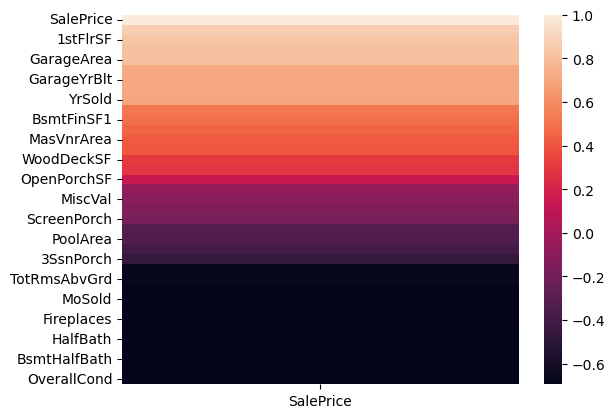

In [24]:
# def plot_correlation_heatmap(target_col: str or None):

#     corr_data: pd.DataFrame
    
#     if target_col is None:
corr_price = train.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(ascending=False)
#     elif isinstance(target_col, str):
#         corr_data = train.corr(method='pearson')

sns.heatmap(corr_price.to_frame())
plt.show()

# plot_correlation_heatmap('SalePrice')

## Correlation between Predictor Variables (Multicollinearity)

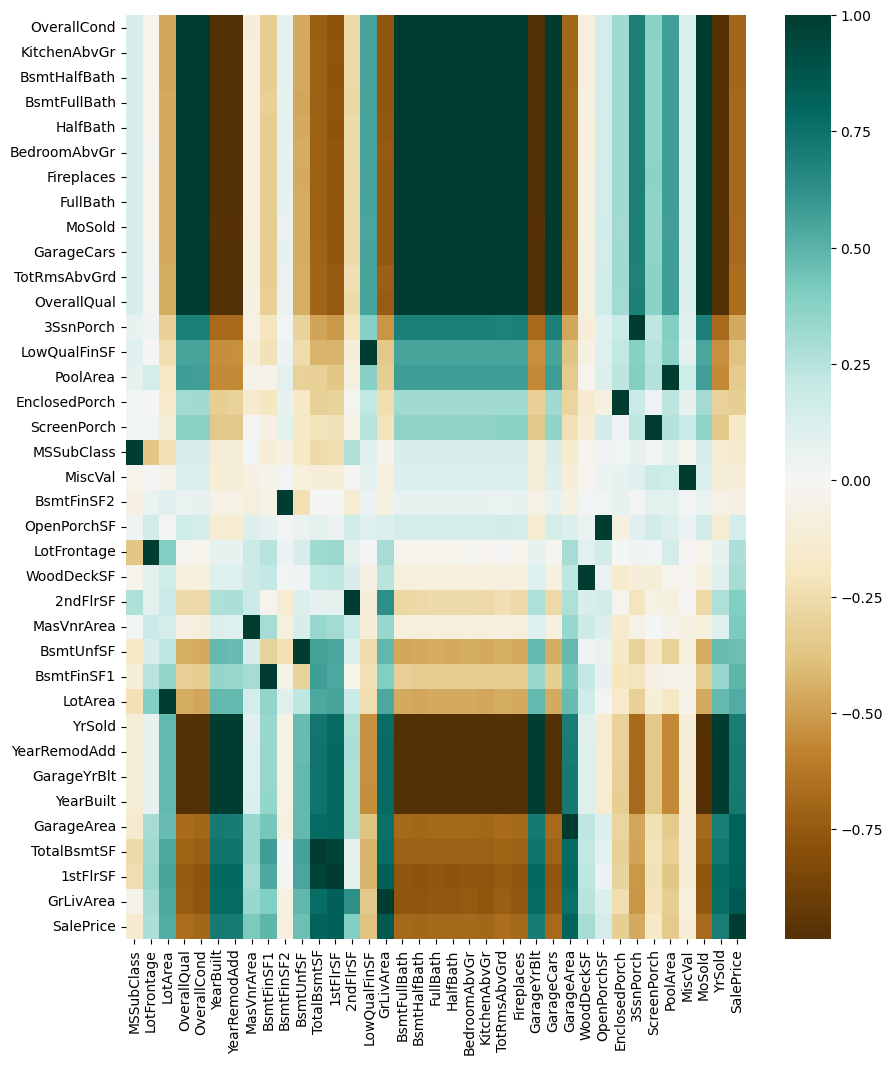

In [25]:
corr_df = train.corr(method='pearson', numeric_only=True).sort_values(by='SalePrice')
fig = plt.figure(figsize=(10,12))
sns.heatmap(corr_df,cmap='BrBG', figure=fig )
plt.show()

In [26]:
corr_df


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallCond,0.128921,-0.029232,-0.466425,0.997602,1.000000,-0.982941,-0.982671,-0.098381,-0.330013,0.065114,...,-0.088510,0.142924,0.315882,0.691083,0.365172,0.572687,0.121656,0.994280,-0.983007,-0.694028
KitchenAbvGr,0.132833,-0.029739,-0.466629,0.998572,0.999137,-0.985117,-0.985489,-0.092208,-0.328687,0.063153,...,-0.089000,0.145484,0.313572,0.691804,0.361933,0.573836,0.116895,0.994974,-0.985779,-0.692599
BsmtHalfBath,0.131101,-0.030250,-0.466844,0.998547,0.999151,-0.985465,-0.985845,-0.092336,-0.328255,0.063812,...,-0.088214,0.145069,0.313312,0.692208,0.362076,0.574093,0.116834,0.994930,-0.986157,-0.692568
BsmtFullBath,0.130821,-0.028102,-0.463875,0.998560,0.998957,-0.985072,-0.985534,-0.090398,-0.318020,0.066224,...,-0.085999,0.146839,0.312548,0.691729,0.362422,0.575302,0.117393,0.994753,-0.985893,-0.689371
HalfBath,0.134519,-0.029378,-0.465969,0.998675,0.998953,-0.985072,-0.985533,-0.089000,-0.328729,0.062747,...,-0.086801,0.148710,0.311952,0.691802,0.363204,0.574400,0.115972,0.994800,-0.985916,-0.689060
BedroomAbvGr,0.130416,-0.021619,-0.462724,0.998455,0.998874,-0.984039,-0.984413,-0.088951,-0.330781,0.063738,...,-0.086188,0.148093,0.314248,0.691075,0.363781,0.575365,0.118307,0.994757,-0.984675,-0.688111
Fireplaces,0.130454,-0.024518,-0.461717,0.998837,0.998907,-0.984933,-0.985366,-0.086973,-0.323175,0.063788,...,-0.084828,0.149464,0.312506,0.691658,0.365912,0.575845,0.118117,0.994830,-0.985743,-0.685048
FullBath,0.133544,-0.026003,-0.464176,0.999044,0.998845,-0.984337,-0.984855,-0.086732,-0.327394,0.061857,...,-0.084256,0.151197,0.310206,0.692324,0.362194,0.574598,0.116349,0.994956,-0.985399,-0.684032
MoSold,0.129215,-0.025344,-0.462668,0.994226,0.994280,-0.977768,-0.978130,-0.089755,-0.327259,0.059824,...,-0.082892,0.154607,0.306522,0.690185,0.361874,0.566595,0.118157,1.000000,-0.978544,-0.683227
GarageCars,0.130644,-0.022995,-0.462823,0.999099,0.998700,-0.984034,-0.984609,-0.083541,-0.324122,0.061691,...,-0.083019,0.151559,0.310072,0.692190,0.362653,0.574010,0.115333,0.994872,-0.985195,-0.681107


## Drop highly correlated independent variables

In [27]:
to_drop = corr_df.query('OverallCond >.80 and OverallCond >-.80').index.tolist()
to_drop.append('OverallQual')
train.drop(columns=to_drop, inplace=True)
train

,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,2Story,2003,2003,VinylSd,VinylSd,196.0,...,548,0,61,0,0,0,0,0,2008,208500
2,20,80.0,9600,Veenker,1Story,1976,1976,MetalSd,MetalSd,0.0,...,460,298,0,0,0,0,0,0,2007,181500
3,60,68.0,11250,CollgCr,2Story,2001,2002,VinylSd,VinylSd,162.0,...,608,0,42,0,0,0,0,0,2008,223500
4,70,60.0,9550,Crawfor,2Story,1915,1970,Wd Sdng,Wd Shng,0.0,...,642,0,35,272,0,0,0,0,2006,140000
5,60,84.0,14260,NoRidge,2Story,2000,2000,VinylSd,VinylSd,350.0,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Gilbert,2Story,1999,2000,VinylSd,VinylSd,0.0,...,460,0,40,0,0,0,0,0,2007,175000
1457,20,85.0,13175,NWAmes,1Story,1978,1988,Plywood,Plywood,119.0,...,500,349,0,0,0,0,0,0,2010,210000
1458,70,66.0,9042,Crawfor,2Story,1941,2006,CemntBd,CmentBd,0.0,...,252,0,60,0,0,0,0,2500,2010,266500


In [29]:
str_cols = train.select_dtypes('object').columns.to_list()

for col in str_cols:
    bools= train[col].str.contains('\d+')
    if bools.sum() > 0:
        print(col)

HouseStyle


In [30]:
train.HouseStyle.value_counts()

1Story    541
2Story    347
68.0      134
1.5Fin    117
80.0       62
50.0       49
SLvl       44
SFoyer     23
64.0       14
1.5Unf     10
2.5Unf      9
2.5Fin      6
Name: HouseStyle, dtype: int64

# Modeling

## Imports

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


## Preprocessing Pipeline

In [ ]:
import regex as re

def scale_encode(df: pd.DataFrame) -> pd.DataFrame:
    scaler = StandardScaler() 
   # encoder = OneHotEncoder() 
    
    X_num = df.select_dtypes(exclude='object')  
                                                                 
    X_scaled = scaler.fit_transform(X_num) 

    #X_encoded = pd.get_dummies(df, prefix='enc_') 

   # X_dummies= X_encoded.filter(regex='enc_', axis=1) 

    X_final = pd.DataFrame(X_scaled,columns=X_num.columns.to_list(), index=X_num.index)#.join(X_dummies)

    return X_final

    


In [ ]:
X_train_final = scale_encode(X_train)
check_missing(X_train_final)

# Baseline Model (Linear Regression)    

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_final,y_train)

In [ ]:
X_test_final = scale_encode(X_test)
y_pred = linear_reg.predict(X_test_final)


In [ ]:
R2 = linear_reg.score(X_test_final, y_test)
print(f"The R^2 value for this model is : {R2}")

residuals = y_test-y_pred
plt.hist(residuals)
plt.show()

In [ ]:
y_pred_m = np.maximum(0, y_pred)
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

# Baseline Model (Decision Tree)

In [ ]:
dt = DecisionTreeRegressor(criterion='squared_error')

dt.fit(X_train_final, y_train)

In [ ]:
dt.feature_names_in_

In [ ]:
dt.predict(X_test)